In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

In [2]:
train = pd.read_csv('../input/tanzania-tourism-prediction/Train.csv')
test = pd.read_csv('../input/tanzania-tourism-prediction/Test.csv')
sub = pd.read_csv('../input/tanzania-tourism-prediction/SampleSubmission.csv')

In [3]:
# combine train and test for EDA
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train,test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (6410, 23)


In [4]:
all_data = train.copy()

In [5]:
# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

In [6]:
all_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [7]:
all_data.duplicated().sum()

0

In [8]:
all_data.isnull().sum()/ len(all_data)

ID                       0.000000
country                  0.000000
age_group                0.000000
travel_with              0.231649
total_female             0.000624
total_male               0.001040
purpose                  0.000000
main_activity            0.000000
info_source              0.000000
tour_arrangement         0.000000
package_transport_int    0.000000
package_accomodation     0.000000
package_food             0.000000
package_transport_tz     0.000000
package_sightseeing      0.000000
package_guided_tour      0.000000
package_insurance        0.000000
night_mainland           0.000000
night_zanzibar           0.000000
payment_mode             0.000000
first_trip_tz            0.000000
most_impressing          0.065086
total_cost               0.000000
dtype: float64

In [9]:
country = all_data['country'].value_counts()

In [10]:
all_data['country'].unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

In [11]:
africa = ['SOUTH AFRICA','NIGERIA','MOZAMBIQUE', 'RWANDA','KENYA', 'ALGERIA','EGYPT','MALAWI',
          'UGANDA','ZIMBABWE', 'ZAMBIA', 'CONGO','MAURITIUS', 'DRC','SWAZILAND', 'TUNISIA',
          'ETHIOPIA','BURUNDI','GHANA', 'NIGER','ANGOLA','CAPE VERDE', 'SUDAN','NAMIBIA',
          'LESOTHO','IVORY COAST', 'MADAGASCAR', 'DJIBOUT','MORROCO','BOTSWANA','LIBERIA',
          'GUINEA', 'SOMALI','COMORO',
          ]
is_african = []

for country in all_data['country']:
    if country in africa:
        is_african.append(True)
    else:
        is_african.append(False)

all_data['is_african'] = is_african


In [12]:
all_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,False
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,False
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,False


In [13]:
all_data['is_african'].value_counts()

False    3494
True     1315
Name: is_african, dtype: int64

In [14]:
all_data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [15]:
all_data.describe(include=['O'])

,ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode,first_trip_tz,most_impressing
count,4809,4809,4809,3695,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4496
unique,4809,105,4,5,7,9,8,2,2,2,2,2,2,2,2,4,2,7
top,tour_0,UNITED STATES OF AMERICA,25-44,Alone,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,Cash,Yes,Friendly People
freq,1,695,2487,1265,2840,2259,1913,2570,3357,2602,2748,2919,3319,3259,4079,4172,3243,1541


In [16]:
#drop ID column 
all_data.drop(columns= ['ID'],inplace=True)

In [17]:
for i in all_data.describe(include=['O']):
    print(i)
    print('---'*10)
    print(all_data[i].value_counts())

country
------------------------------
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
NIGER                         1
MYANMAR                       1
DOMINICA                      1
TUNISIA                       1
ESTONIA                       1
Name: country, Length: 105, dtype: int64
age_group
------------------------------
25-44    2487
45-64    1391
1-24      624
65+       307
Name: age_group, dtype: int64
travel_with
------------------------------
Alone                  1265
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: travel_with, dtype: int64
purpose
------------------------------
Leisure and Holidays              2840
Business                           671
Visiting Friends and Relatives     633
Meetings and Conference            312
Volunteering                   

In [18]:
all_data.columns

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'total_cost', 'is_african'],
      dtype='object')

In [19]:
all_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,False
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,False
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,False


In [20]:
#converting our TZS into dollars 
all_data['total_cost'] = all_data['total_cost']
all_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,False
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,False
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,False


In [21]:
#groupby function 
#Assessing country 
country_avg_spending  = pd.DataFrame(all_data.groupby(['country'])['total_cost'].mean().sort_values(ascending=False))

In [22]:
country_avg_spending.head(10)

,total_cost
country,
DOMINICA,3.315000e+07
COSTARICA,2.718300e+07
SLOVENIA,1.906237e+07
TUNISIA,1.574625e+07
AUSTRALIA,1.474802e+07
DENMARK,1.456879e+07
ISRAEL,1.430542e+07
RUSSIA,1.358321e+07
COLOMBIA,1.331525e+07


In [23]:
#age_group by total_cost
age_avg_spending  = pd.DataFrame(all_data.groupby(['age_group'])['total_cost'].mean().sort_values(ascending=False))
age_avg_spending.head()

,total_cost
age_group,
65+,1.721195e+07
45-64,1.105093e+07
25-44,6.026176e+06
1-24,5.415205e+06


In [24]:
# age group and country 
#age_group by total_cost
age_country_avg_spending  = pd.DataFrame(all_data.groupby(['country','age_group'])['total_cost'].mean().sort_values(ascending=False))
age_country_avg_spending.head(10)

,,total_cost
country,age_group,
SWEDEN,65+,5.221125e+07
NEW ZEALAND,65+,3.729375e+07
DOMINICA,65+,3.315000e+07
ISRAEL,45-64,3.163753e+07
QATAR,25-44,2.970630e+07
AUSTRALIA,65+,2.730855e+07
COSTARICA,25-44,2.718300e+07
DENMARK,65+,2.622609e+07
MEXICO,45-64,2.502825e+07


In [25]:
all_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,False
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,False
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,False


In [26]:
#age_group by total_cost
travel_avg_spending  = pd.DataFrame(all_data.groupby(['travel_with'])['total_cost'].mean().sort_values(ascending=False))
travel_avg_spending.head()

,total_cost
travel_with,
Spouse and Children,1.833085e+07
Spouse,1.268289e+07
Friends/Relatives,1.023318e+07
Children,1.020680e+07
Alone,3.426150e+06


<AxesSubplot:xlabel='total_cost', ylabel='Density'>

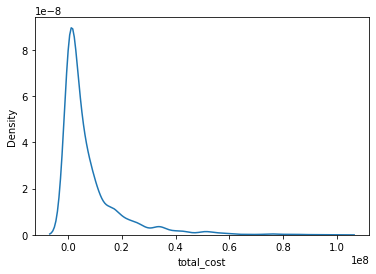

In [27]:
sns.kdeplot(all_data['total_cost'])

In [28]:
#age_group by total_cost
purpose_avg_spending  = pd.DataFrame(all_data.groupby(['purpose'])['total_cost'].mean().sort_values(ascending=False))
purpose_avg_spending.head(10)

,total_cost
purpose,
Leisure and Holidays,1.195114e+07
Scientific and Academic,4.031990e+06
Volunteering,3.950565e+06
Visiting Friends and Relatives,3.190776e+06
Meetings and Conference,2.453004e+06
Business,1.782438e+06
Other,1.592155e+06


In [29]:
#age_group by total_cost
ma_avg_spending  = pd.DataFrame(all_data.groupby(['main_activity'])['total_cost'].mean().sort_values(ascending=False))
ma_avg_spending.head(10)

,total_cost
main_activity,
Diving and Sport Fishing,1.709434e+07
Wildlife tourism,1.059533e+07
Conference tourism,1.030680e+07
business,8.125078e+06
Beach tourism,7.524837e+06
Bird watching,4.216563e+06
Cultural tourism,3.991139e+06
Hunting tourism,1.911327e+06
Mountain climbing,1.862857e+06


In [30]:
#age_group by total_cost
info_avg_spending  = pd.DataFrame(all_data.groupby(['info_source'])['total_cost'].mean().sort_values(ascending=False))
info_avg_spending.head(10)

,total_cost
info_source,
"Travel, agent, tour operator",1.312327e+07
Trade fair,6.751698e+06
"Newspaper, magazines,brochures",6.386334e+06
"Radio, TV, Web",6.351531e+06
others,4.524773e+06
"Friends, relatives",4.310349e+06
Tanzania Mission Abroad,3.142777e+06
inflight magazines,2.494671e+06


In [31]:
all_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,False
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,False
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,False


In [32]:
#age_group by total_cost
ta_avg_spending  = pd.DataFrame(all_data.groupby(['tour_arrangement'])['total_cost'].mean().sort_values(ascending=False))
ta_avg_spending.head(10)

,total_cost
tour_arrangement,
Package Tour,1.425958e+07
Independent,2.760664e+06


In [33]:
#age_group by total_cost
pm_avg_spending  = pd.DataFrame(all_data.groupby(['payment_mode'])['total_cost'].mean().sort_values(ascending=False))
pm_avg_spending.head(10)

,total_cost
payment_mode,
Travellers Cheque,1.820063e+07
Credit Card,1.127746e+07
Cash,7.632609e+06
Other,4.608355e+06


In [34]:
#age_group by total_cost
ftz_avg_spending  = pd.DataFrame(all_data.groupby(['first_trip_tz'])['total_cost'].mean().sort_values(ascending=False))
ftz_avg_spending.head(10)

,total_cost
first_trip_tz,
Yes,1.008298e+07
No,4.037669e+06


In [35]:
#age_group by total_cost
mi_avg_spending  = pd.DataFrame(all_data.groupby(['most_impressing'])['total_cost'].mean().sort_values(ascending=False))
mi_avg_spending.head(10)

,total_cost
most_impressing,
Wildlife,1.091794e+07
Friendly People,8.230207e+06
Good service,7.970768e+06
"Wonderful Country, Landscape, Nature",7.851652e+06
Excellent Experience,7.430729e+06
No comments,6.627722e+06
Satisfies and Hope Come Back,5.661282e+06


In [36]:
#age_group by total_cost
ia_avg_spending  = pd.DataFrame(all_data.groupby(['is_african'])['total_cost'].mean().sort_values(ascending=False))
ia_avg_spending.head(10)

,total_cost
is_african,
False,1.001370e+07
True,3.067858e+06


In [37]:
all_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,False
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,False
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,False


In [38]:
#check for null values
all_data.isnull().sum()

country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
is_african                  0
dtype: int64

In [39]:
# replace null values with 0
# combining both our train and test dataset to have one that we can clean both datasets
data=pd.concat([train,test],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [40]:
# Handling the missing values by filling 'None' throughout all instances
data.travel_with.fillna('None',inplace=True)
data.most_impressing.fillna('None',inplace=True)
# Handling the missing values by filling through the mean value of the entire column
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)

In [41]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

In [42]:
africa = ['SOUTH AFRICA','NIGERIA','MOZAMBIQUE', 'RWANDA','KENYA', 'ALGERIA','EGYPT','MALAWI',
          'UGANDA','ZIMBABWE', 'ZAMBIA', 'CONGO','MAURITIUS', 'DRC','SWAZILAND', 'TUNISIA',
          'ETHIOPIA','BURUNDI','GHANA', 'NIGER','ANGOLA','CAPE VERDE', 'SUDAN','NAMIBIA',
          'LESOTHO','IVORY COAST', 'MADAGASCAR', 'DJIBOUT','MORROCO','BOTSWANA','LIBERIA',
          'GUINEA', 'SOMALI','COMORO',
          ]
is_african = []

for country in data['country']:
    if country in africa:
        is_african.append(True)
    else:
        is_african.append(False)

data['is_african'] = is_african

In [43]:
peak_period = []

for row in data.purpose:
    if row == 'Leisure and Holidays':
        peak_period.append(True)
    else:
        peak_period.append(False)

data['peak_period'] = peak_period

In [44]:
old_folks = []

for row in data.age_group:
    if row == '65+':
        old_folks.append(True)
    else :
        old_folks.append(False)

data['old_folks'] = old_folks

In [45]:
# Here we get two more features of the total number of people and the total number of nights spent
data["total_persons"] = data["total_female"] + data["total_male"]

data["total_nights_spent"] = data["night_mainland"] + data["night_zanzibar"]

In [46]:
data.shape

(6410, 28)

In [47]:
data.head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african,peak_period,old_folks,total_persons,total_nights_spent
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False,True,False,2.0,13.0
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False,True,False,1.0,21.0


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])
data['peak_period'] = le.fit_transform(data['peak_period'])
data['is_african'] = le.fit_transform(data['is_african'])
data['old_folks'] = le.fit_transform(data['old_folks'])

In [49]:
data.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african,peak_period,old_folks,total_persons,total_nights_spent
0,tour_0,101,3,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,0,0,0,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5,0,1,0,2.0,13.0
1,tour_10,111,2,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,0,0,0,0,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5,0,1,0,1.0,21.0
2,tour_1000,111,2,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,0,0,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0,0,0,0,1.0,32.0


In [50]:
columns_to_transform = ['tour_arrangement',
                        'travel_with',
                        'purpose',
                        'main_activity',
                        'info_source',
                        'most_impressing',
                        'payment_mode']
data = pd.get_dummies( data,columns = columns_to_transform,drop_first=True)

In [51]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

In [52]:
data.head()

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,is_african,peak_period,old_folks,total_persons,total_nights_spent,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,101,3,1,1,0,0,0,0,0,0,0,13,0,0,674602.5,0,1,0,2.0,13.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,tour_10,111,2,1,0,0,0,0,0,0,0,0,14,7,1,3214906.5,0,1,0,1.0,21.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,tour_1000,111,2,0,1,0,0,0,0,0,0,0,1,31,0,3315000.0,0,0,0,1.0,32.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,tour_1002,111,2,1,1,0,1,1,1,1,1,0,11,0,1,7790250.0,0,1,0,2.0,11.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,tour_1004,17,0,1,0,0,0,0,0,0,0,0,7,4,1,1657500.0,0,1,0,1.0,11.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
data.dtypes

ID                                                       object
country                                                   int64
age_group                                                 int64
total_female                                              int64
total_male                                                int64
package_transport_int                                     int64
package_accomodation                                      int64
package_food                                              int64
package_transport_tz                                      int64
package_sightseeing                                       int64
package_guided_tour                                       int64
package_insurance                                         int64
night_mainland                                            int64
night_zanzibar                                            int64
first_trip_tz                                             int64
total_cost                              

In [54]:
## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)

In [55]:
print(train_df.shape)
print(test_df.shape)

(4809, 58)
(1601, 58)


In [56]:
#Modelling
feat_cols = train_df.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train_df["total_cost"]
trans_target = target.apply(np.log10)

<AxesSubplot:xlabel='total_cost', ylabel='Density'>

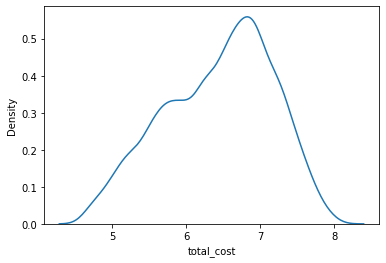

In [57]:
sns.kdeplot(trans_target)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [59]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_df[cols],target, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 56) (3606,)
(1203, 56) (1203,)


In [60]:
from catboost import CatBoostRegressor
predictions = []
for i in range(10):
    ct=CatBoostRegressor(iterations=1000, 
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = i
                    )
    ct.fit(X_train, y_train)
    preds = ct.predict(X_test)
    predictions.append(preds)
    preds = np.mean(predictions, axis = 0)


In [61]:
# Model evaluation
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, preds)
print('Error {}'.format(mae))

Error 4662442.094621236


In [62]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

lgbmr =RandomForestRegressor()
lgbmr.fit(X_train, y_train)
lgb_preds = lgbmr.predict(X_test)

mae = mean_absolute_error(y_test, lgb_preds)
print('RandomForestRegressor Error {}'.format(mae))

xgbmr =xgb.XGBRegressor()
xgbmr.fit(X_train, y_train)
xgb_preds = xgbmr.predict(X_test)

mae = mean_absolute_error(y_test, xgb_preds)
print('XGBR Error {}'.format(mae))

RandomForestRegressor Error 5306683.368565872
XGBR Error 5744824.410670771


In [63]:
# Doing our prediction.
sub = test_df[cols]
predictions_ct = ct.predict(sub)
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': predictions_ct})

In [64]:
submission_df.head()

,ID,total_cost
0,tour_1,2.285895e+07
1,tour_100,2.239260e+07
2,tour_1001,1.167215e+07
3,tour_1006,3.209230e+06
4,tour_1009,2.097290e+07


In [65]:

submission_df.to_csv('cbr_target.csv',index=False)